In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
base = "/home/kevin/workspace/todo/kaggle-kevin/competitions"

folder = os.path.join(base, "dog-breed-identification/20180929")
#folder = os.path.join(base, "cifar-10/20180928-resnet164_v2")

In [42]:
df = pd.DataFrame()
p = re.compile(r'[\w\d_]*-(\d*)-\[(.*)\]-\[(.*)\].csv')
for f in os.listdir(os.path.abspath(folder)):
    print(f)
    m = p.match(f)
    if m is not None:
        a = []
        print(m.group(2))
        input_params = m.group(2).split('-')
        output_params = m.group(3).split('-')
        a.insert(0,m.group(1))
        a += input_params
        a += output_params
        a.append(f)
        df = pd.concat([df, pd.DataFrame([a])],axis=0)
#print(df)

resnet180-32-[80-0.001000-0.000100-80-0.100000]-[0.006671-0.997962-0.003299-0.998641].csv
80-0.001000-0.000100-80-0.100000


In [43]:
df.columns=['batch_size', 'epoch', 'learning_rate', 'wd', 'lr_period', 'lr_decay', 
            'train_loss', 'train_acc', 'valid_loss', 'valid_acc','filename']

In [45]:
df = df.sort_values('valid_acc', ascending=False).reset_index(drop=True)
df.iloc[:,:-1]

,batch_size,epoch,learning_rate,wd,lr_period,lr_decay,train_loss,train_acc,valid_loss,valid_acc
0,32,80,0.001000,0.000100,80,0.100000,0.006671,0.997962,0.003299,0.998641


resnet180-32-[80-0.001000-0.000100-80-0.100000]-[0.006671-0.997962-0.003299-0.998641].csv


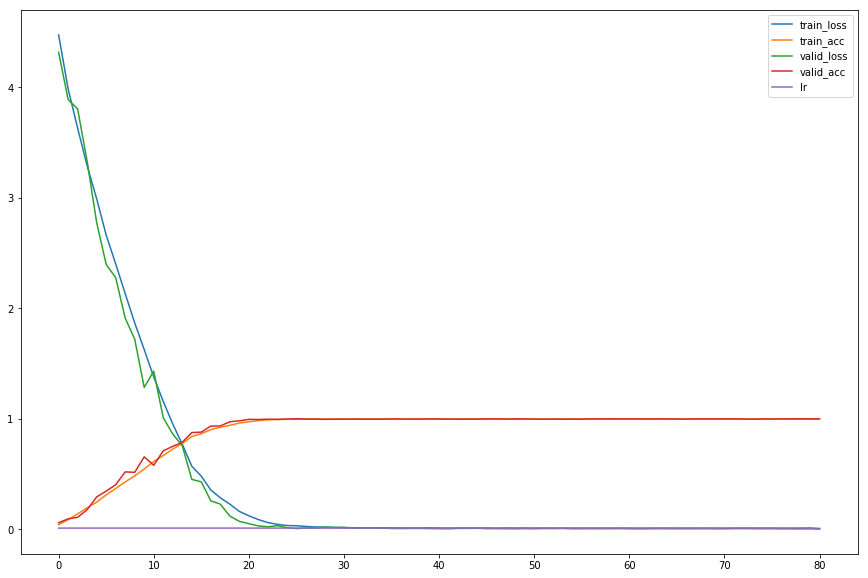

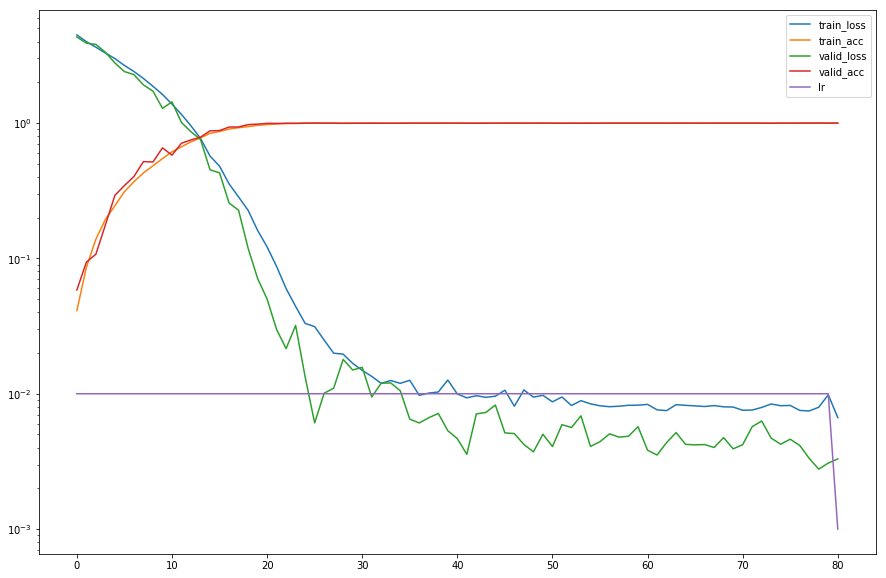

In [46]:
for f in df['filename'].values:
    print(f)
    dft = pd.read_csv(folder+"/"+f)
    
    plt.figure(figsize=(15,10))
    plt.plot(dft)
    plt.legend(dft.columns)    
    plt.show()
    
    plt.figure(figsize=(15,10))
    plt.semilogy(dft)
    plt.legend(dft.columns)    
    plt.show()